In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as sstats
import sklearn.linear_model as linear_model

In [3]:
training_set = pd.read_csv('./data/train.csv')
testing_set = pd.read_csv('./data/test.csv')

# Drop Id column
training_set.drop("Id", axis = 1, inplace = True)

training_set.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig    ...     PoolArea PoolQC Fence  \
0         Lvl    AllPub    Inside    ...            0    NaN   NaN   
1         Lvl    AllPub       FR2    ...            0    NaN   NaN   
2         Lvl    AllPub    Inside    ...            0    NaN   NaN   
3         Lvl    AllPub    Corner    ...            0    NaN   NaN   
4         Lvl    AllPub       FR2    ...            0    NaN   NaN   

  MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0         NaN       0      2    2008        WD         Normal     208500  
1         NaN       0      5    2007        WD         Normal     181500  
2         NaN       0      9    2008        WD         Normal     223500  
3         NaN       0      2    2006        WD        Abnorml     140000  
4         NaN       0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

In [4]:
numerical_features = [f for f in training_set.columns if training_set.dtypes[f] != 'object']

In [5]:
## Fill null values
training_set.loc[:,"Alley"] = training_set.loc[:,"Alley"].fillna("NA")
training_set.loc[:,"Fence"] = training_set.loc[:,"Fence"].fillna("NA")
training_set.loc[:,"MiscFeature"] = training_set.loc[:,"MiscFeature"].fillna("NA")
training_set.loc[:,"PoolQC"] = training_set.loc[:,"PoolQC"].fillna("NA")
training_set.loc[:,"LotFrontage"] = training_set.loc[:,"LotFrontage"].fillna(0)

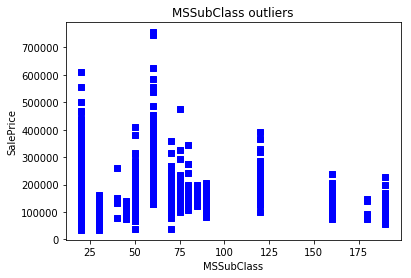

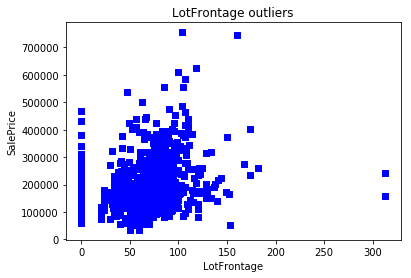

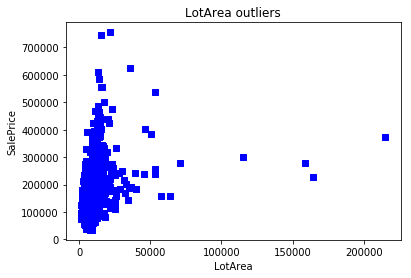

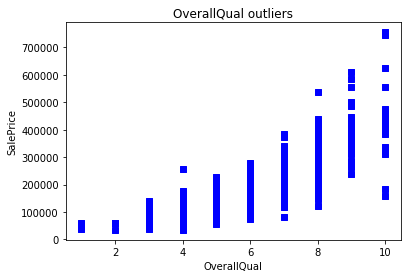

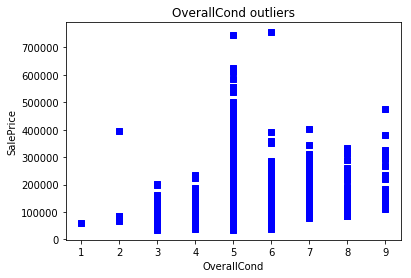

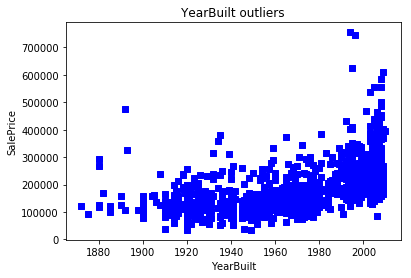

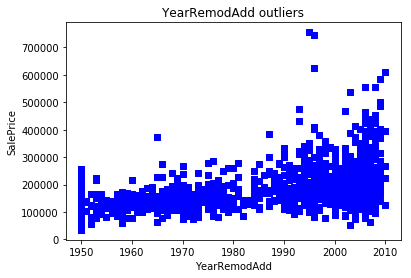

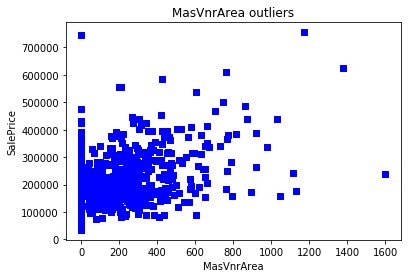

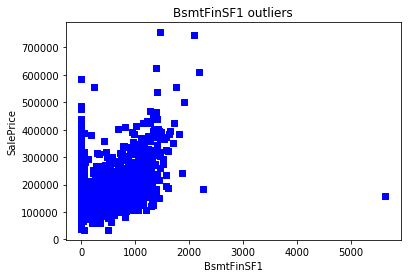

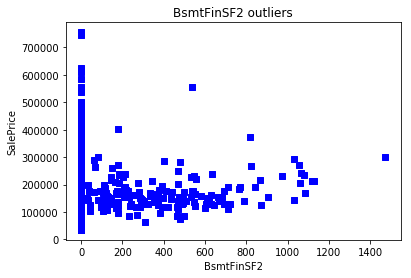

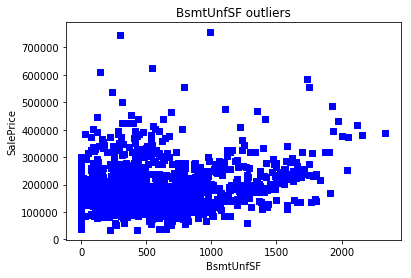

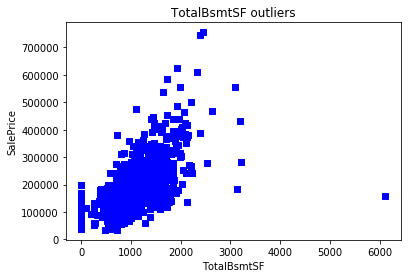

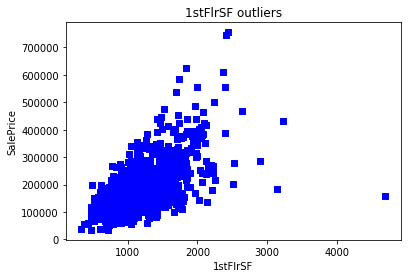

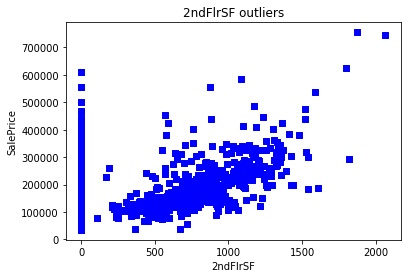

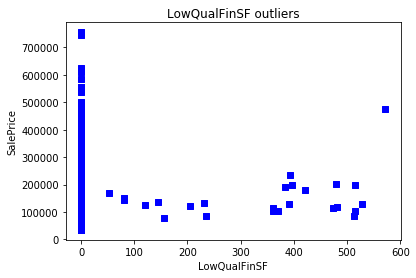

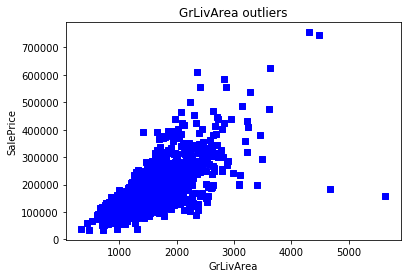

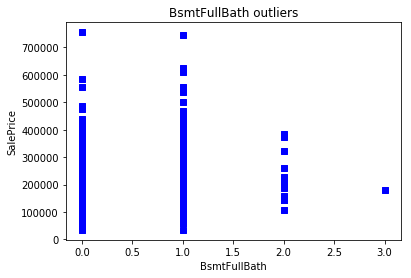

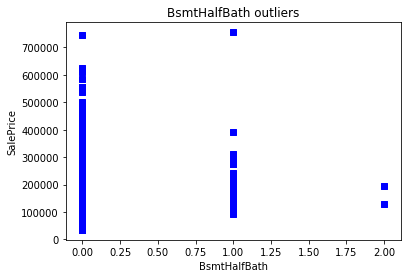

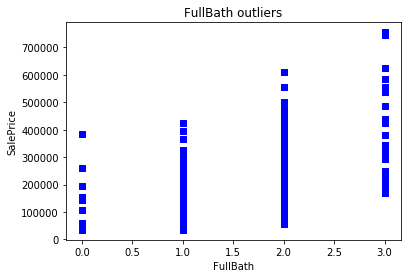

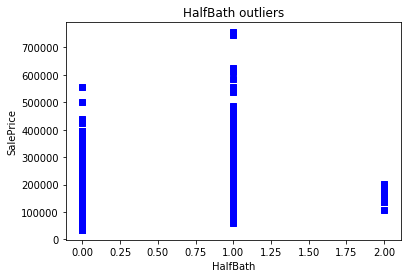

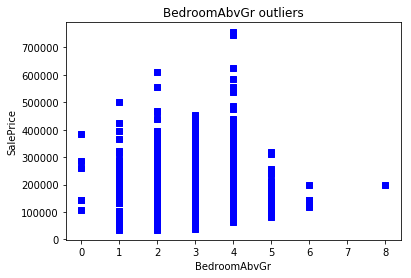

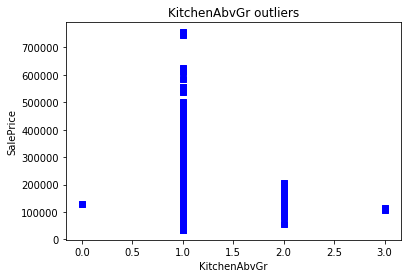

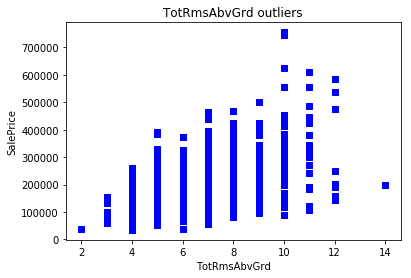

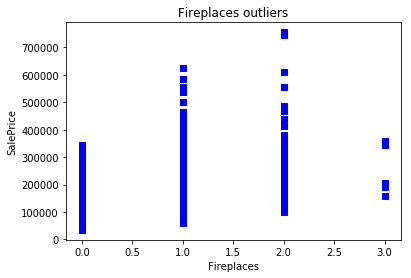

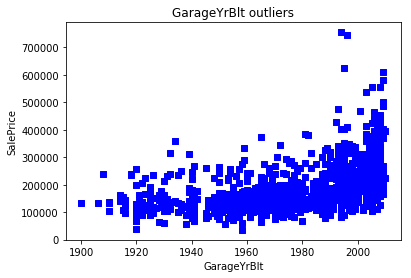

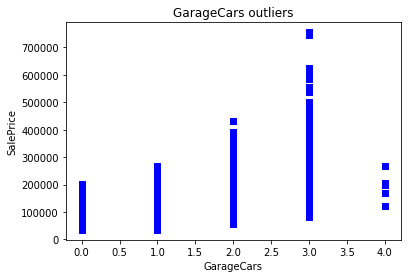

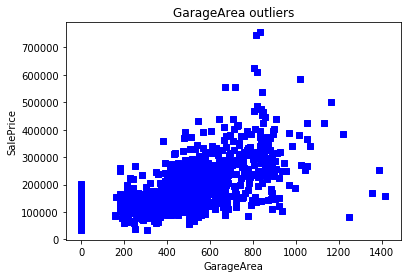

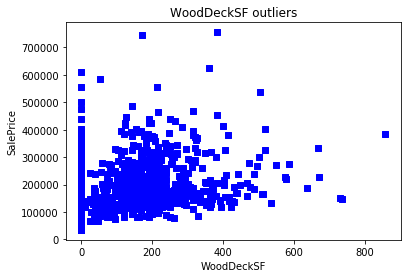

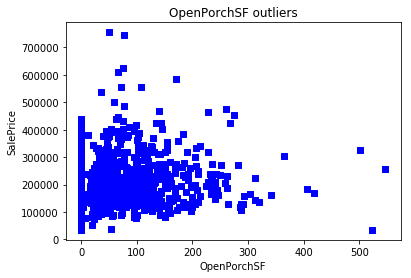

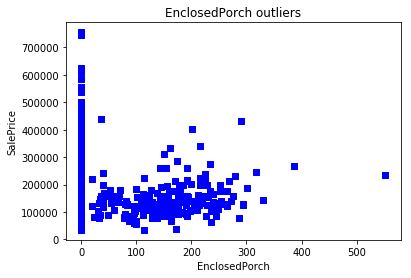

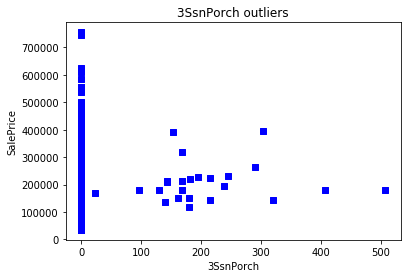

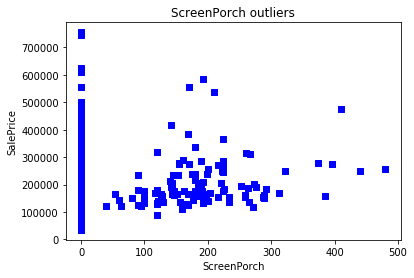

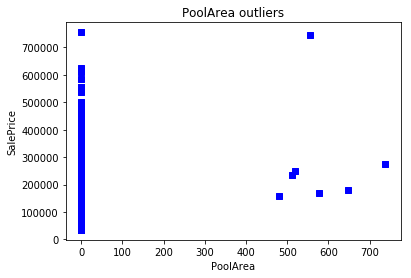

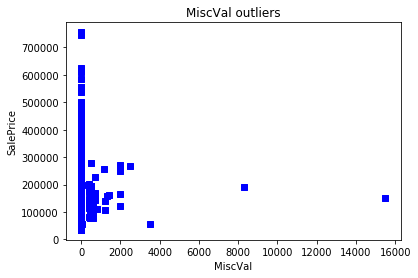

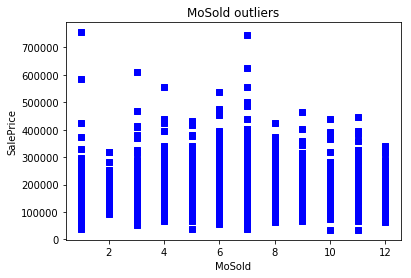

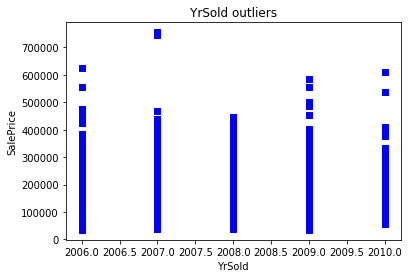

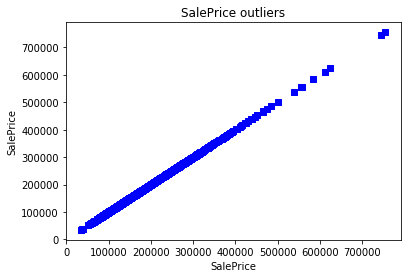

In [6]:
# outliers 
for column in numerical_features:
    plt.scatter(training_set[column], training_set.SalePrice, c = "blue", marker = "s")
    plt.title(column+ " outliers")
    plt.xlabel(column)
    plt.ylabel("SalePrice")
    plt.show()

In [7]:
training_set = training_set[training_set.MiscVal < 4000]
training_set = training_set[training_set.ScreenPorch < 400]
training_set = training_set[training_set.EnclosedPorch < 400]
training_set = training_set[training_set.OpenPorchSF < 400]
training_set = training_set[training_set.WoodDeckSF < 800]
training_set = training_set[training_set.GarageArea < 1200]
training_set = training_set[training_set.TotRmsAbvGrd < 13]
training_set = training_set[training_set.BedroomAbvGr < 7]
training_set = training_set[training_set.BsmtFullBath < 2.5]
training_set = training_set[training_set.BsmtHalfBath < 1.25]
training_set = training_set[training_set.GrLivArea < 4000]
training_set = training_set[training_set['2ndFlrSF'] < 1700]
training_set = training_set[training_set['1stFlrSF'] < 3200]
training_set = training_set[training_set['TotalBsmtSF'] < 3000]
training_set = training_set[training_set['BsmtFinSF2'] < 1200]
training_set = training_set[training_set['BsmtFinSF1'] < 3000]
training_set = training_set[training_set['MasVnrArea'] < 1200]
training_set = training_set[training_set['LotArea'] < 40000]
training_set = training_set[training_set['LotFrontage'] < 200]
training_set = training_set[training_set['PoolArea'] < 1]

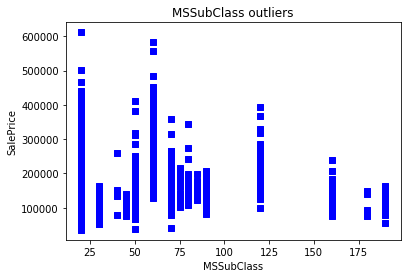

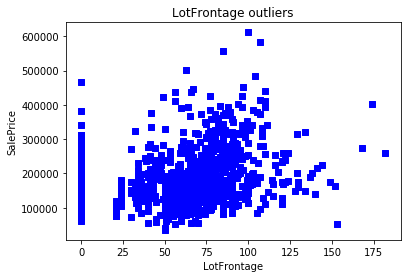

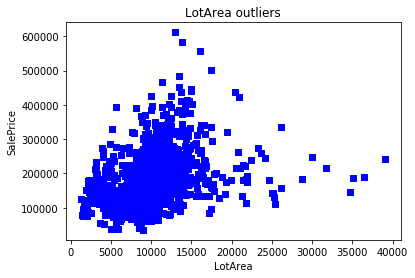

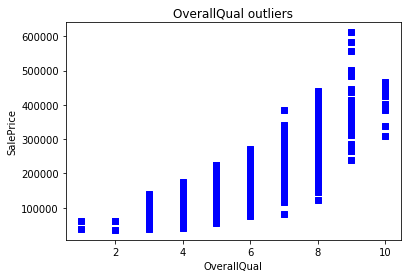

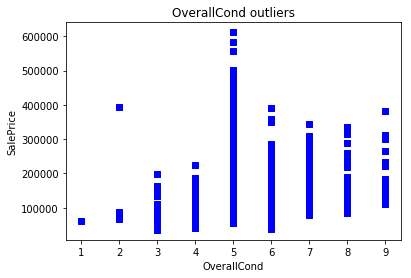

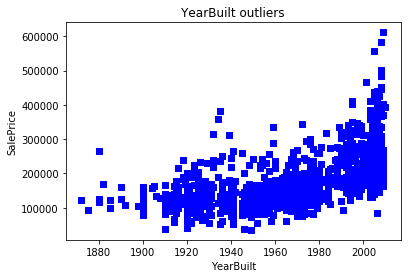

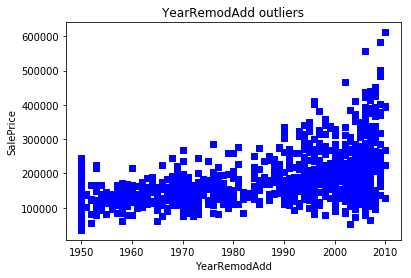

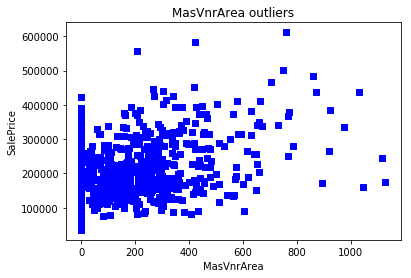

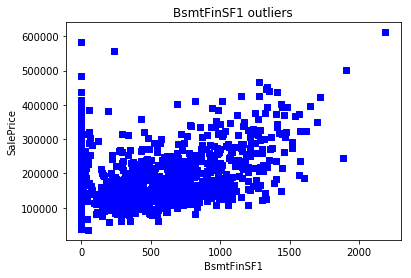

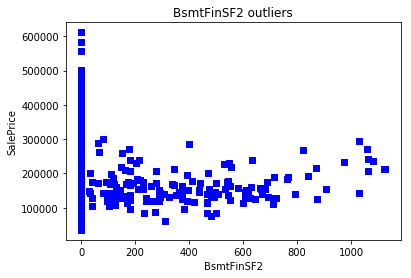

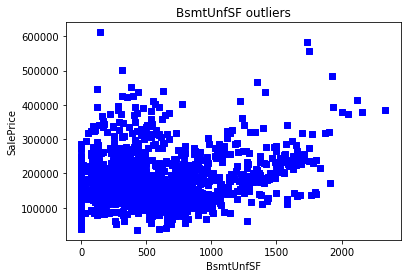

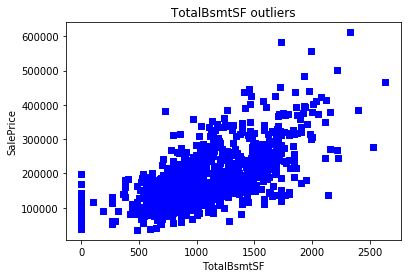

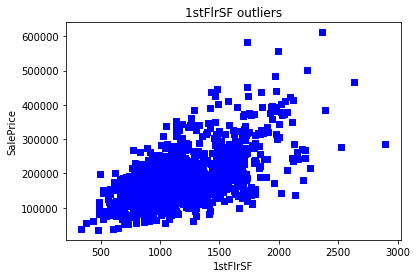

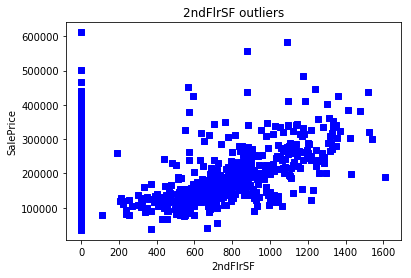

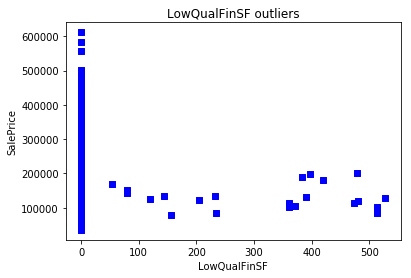

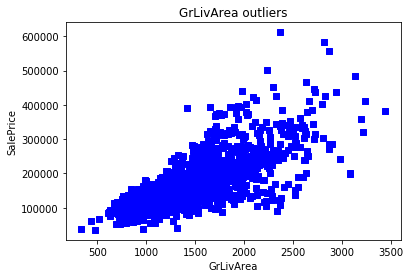

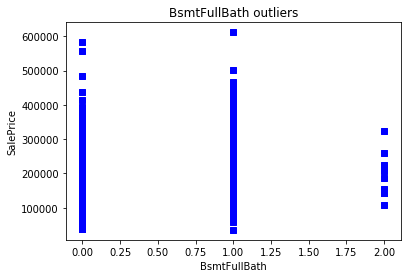

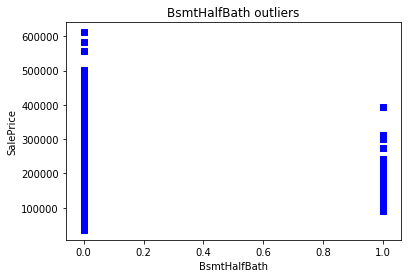

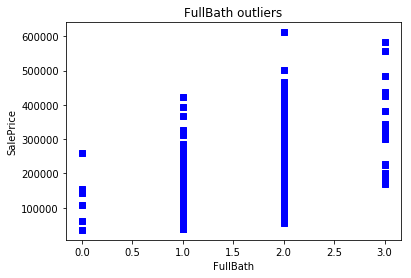

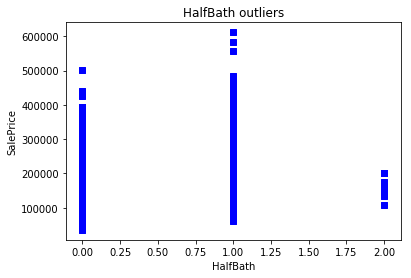

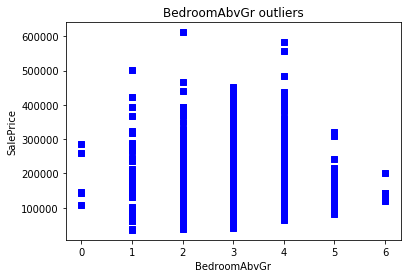

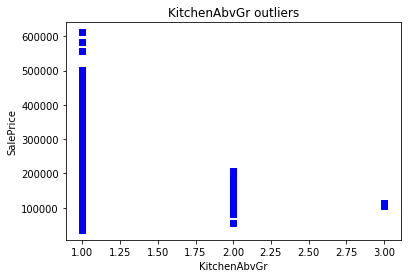

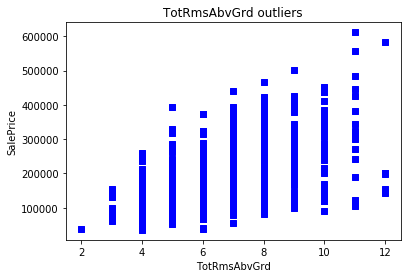

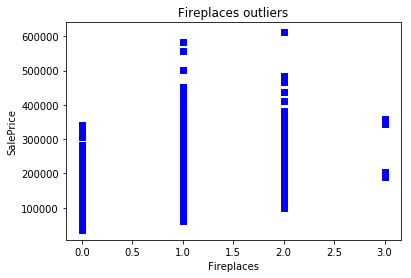

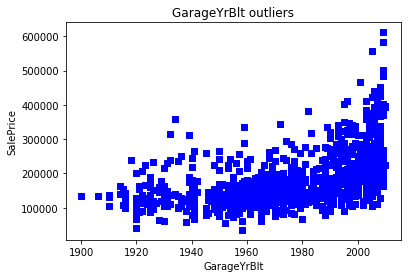

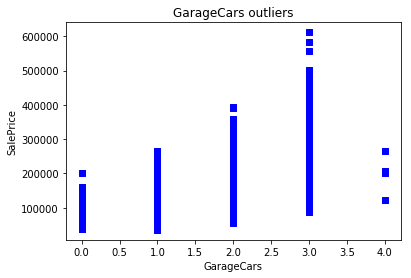

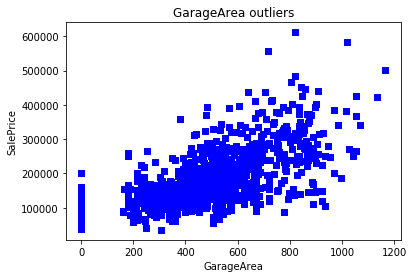

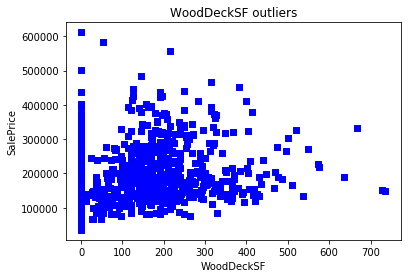

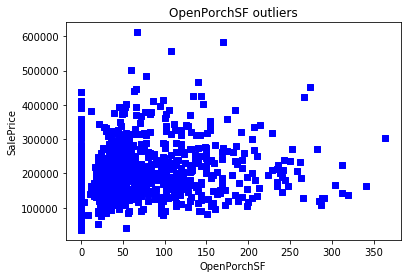

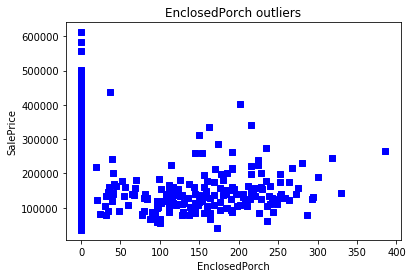

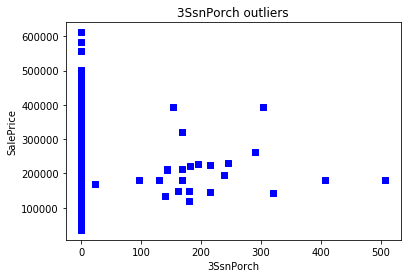

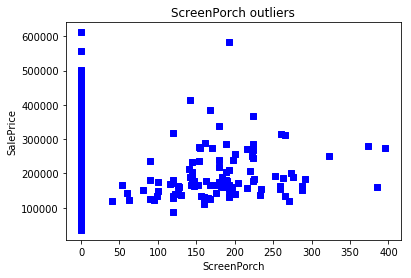

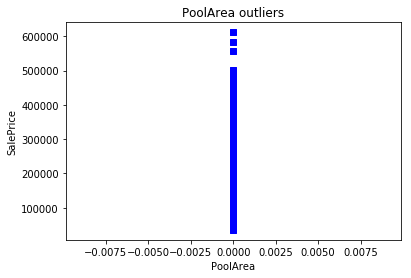

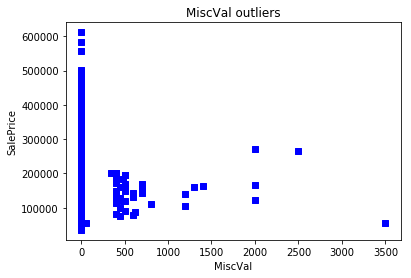

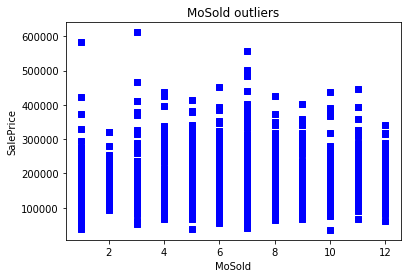

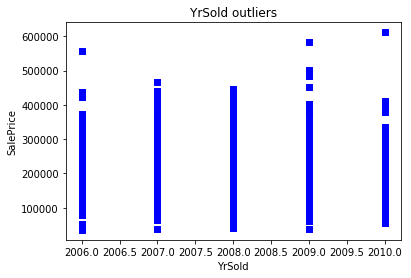

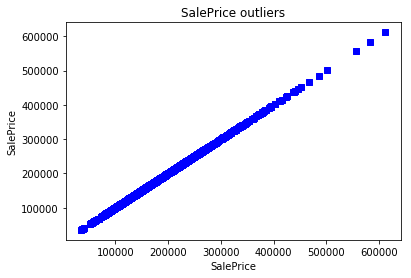

In [8]:
# outliers 
for column in numerical_features:
    plt.scatter(training_set[column], training_set.SalePrice, c = "blue", marker = "s")
    plt.title(column+ " outliers")
    plt.xlabel(column)
    plt.ylabel("SalePrice")
    plt.show()

In [9]:
# checking if too many values removed
training_set.shape

(1408, 80)

In [10]:
# finding top features that are correlated to SalePrice
corr = training_set[numerical_features].corr()
print(corr['SalePrice'].sort_values(ascending=False)[1:11])
numerical_features.remove('SalePrice')

selected_features = ['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','YearBuilt','FullBath','YearRemodAdd','TotRmsAbvGrd']

OverallQual     0.804471
GrLivArea       0.712395
GarageCars      0.659094
GarageArea      0.653082
TotalBsmtSF     0.637028
1stFlrSF        0.612041
YearBuilt       0.574896
FullBath        0.563675
YearRemodAdd    0.536586
TotRmsAbvGrd    0.532307
Name: SalePrice, dtype: float64


In [11]:
def error(actual, predicted):
    actual = np.log(actual)
    predicted = np.log(predicted)
    return np.sqrt(np.sum(np.square(actual-predicted))/len(actual))

# output data frame with predicted SalePrice
output = pd.DataFrame()
output['Id'] = testing_set.Id

ridge = linear_model.Ridge(alpha=10**1)

X = training_set[selected_features]
Y = training_set.SalePrice
ridge_model = ridge.fit(X, Y)

predicated_y = ridge.predict(X)
print("RMSE: "+ str(error(Y, predicated_y)))

X_test = testing_set[selected_features].fillna(0.).values
predicated_saleprice = ridge.predict(X_test)

output['SalePrice'] = predicated_saleprice
output.to_csv('./data/output.csv', index=False)

RMSE: 0.20665539558436644


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
from sklearn.ensemble import RandomForestRegressor
# Random Forest
rf = RandomForestRegressor(max_depth=10, random_state=3, n_estimators=100)
random_forest = rf.fit(X, Y)

predicated_y = random_forest.predict(X)
print ('RMSE = ', error(Y, predicated_y))

predicated_saleprice = random_forest.predict(X_test)

output['SalePrice'] = predicated_saleprice
output.to_csv('./data/output_rf.csv', index=False)

RMSE =  0.07968511971766497
